In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings;
warnings.filterwarnings("ignore")

In [167]:
df1=pd.read_excel('man_2018.xlsx')

In [168]:
df1.head()

,From Date,To Date,BP,CH4,PM2.5,RH,SR,Temp,THC,VWS,WD,WS,CO,NH3,NOx,NO,NO2,SO2
0,01-01-2018 00:00,01-01-2018 01:00,1008.3,0,88.01,89.18,None,None,1768.5,0.23,329.17,0.64,0,199.36,14.66,16.13,8.2,2.76
1,01-01-2018 01:00,01-01-2018 02:00,1007.88,0,75.69,89.19,None,None,1762.45,0.23,328.17,0.61,0,355.8,11.22,15.25,2.66,2.82
2,01-01-2018 02:00,01-01-2018 03:00,1007.55,0,55.88,89.19,None,None,1756.45,0.22,335.16,0.61,0,92.02,9.47,14.49,0.92,2.61
3,01-01-2018 03:00,01-01-2018 04:00,1007.2,0,50.68,89.19,None,None,1749.38,0.21,335.65,0.62,0,152.52,8.95,12.76,1.93,2.58
4,01-01-2018 04:00,01-01-2018 05:00,1006.88,0,47.27,89.19,None,None,1746.85,0.23,328.27,0.57,0,102.63,7.8,10.26,3.26,2.18


In [169]:
df=df1[['From Date','BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']]

In [170]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2018 00:00,1008.3,0,0.23,329.17,0.64,16.13,8.2,88.01,89.18,2.76,None
1,01-01-2018 01:00,1007.88,0,0.23,328.17,0.61,15.25,2.66,75.69,89.19,2.82,None
2,01-01-2018 02:00,1007.55,0,0.22,335.16,0.61,14.49,0.92,55.88,89.19,2.61,None
3,01-01-2018 03:00,1007.2,0,0.21,335.65,0.62,12.76,1.93,50.68,89.19,2.58,None
4,01-01-2018 04:00,1006.88,0,0.23,328.27,0.57,10.26,3.26,47.27,89.19,2.18,None


In [171]:
df.shape

(8760, 12)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
From Date    8760 non-null object
BP           8760 non-null object
CO           8760 non-null object
VWS          8760 non-null object
WD           8760 non-null object
WS           8760 non-null object
NO           8760 non-null object
NO2          8760 non-null object
PM2.5        8760 non-null object
RH           8760 non-null object
SO2          8760 non-null object
SR           8760 non-null object
dtypes: object(12)
memory usage: 821.4+ KB


In [173]:
for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan)

In [174]:
print("Percentage of Null values in Maneli 2018: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Maneli 2018:  9.960996955859969


In [175]:
df.isna().sum()

From Date       0
BP            102
CO            127
VWS           102
WD            122
WS            123
NO            106
NO2           106
PM2.5         126
RH            589
SO2           208
SR           8760
dtype: int64

In [176]:
list1=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
count=0
for i in list1:
    for j in df[i]:
        if(j<0):
            count=count+1

In [177]:
count/(len(df)*12)

0.000884703196347032

In [178]:
for col in list1:
    if(col!='VWS'):
        for j in df[col]:
            if(j<0):
                df[col]=df[col].replace(j,np.nan)

In [179]:
print("Percentage of Null values in Maneli 2018: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Maneli 2018:  9.960996955859969


In [180]:
df.isna().sum()

From Date       0
BP            102
CO            127
VWS           102
WD            122
WS            123
NO            106
NO2           106
PM2.5         126
RH            589
SO2           208
SR           8760
dtype: int64

In [181]:
df=df.dropna(axis=0,subset=['PM2.5'])

In [182]:
m=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
for col in m:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')

In [183]:
df.isna().sum()

From Date       0
BP              0
CO              0
VWS             0
WD              0
WS              0
NO              0
NO2             0
PM2.5           0
RH              0
SO2             0
SR           8634
dtype: int64

In [184]:
df['SR'].replace(np.nan,0,inplace=True)

In [185]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

In [186]:
df['BP']=df['BP'].astype(float)
df['CO']=df['CO'].astype(float)
df['VWS']=df['VWS'].astype(float)
df['WD']=df['WD'].astype(float)
df['WS']=df['WS'].astype(float)
df['NO']=df['NO'].astype(float)
df['NO2']=df['NO2'].astype(float)
df['PM2.5']=df['PM2.5'].astype(float)
df['RH']=df['RH'].astype(float)
df['SO2']=df['SO2'].astype(float)
df['SR']=df['SR'].astype(float)

In [187]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2018 00:00,1008.30,0.0,0.23,329.17,0.64,16.13,8.20,88.01,89.18,2.76,0.0
1,01-01-2018 01:00,1007.88,0.0,0.23,328.17,0.61,15.25,2.66,75.69,89.19,2.82,0.0
2,01-01-2018 02:00,1007.55,0.0,0.22,335.16,0.61,14.49,0.92,55.88,89.19,2.61,0.0
3,01-01-2018 03:00,1007.20,0.0,0.21,335.65,0.62,12.76,1.93,50.68,89.19,2.58,0.0
4,01-01-2018 04:00,1006.88,0.0,0.23,328.27,0.57,10.26,3.26,47.27,89.19,2.18,0.0


In [188]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.0
mean,1005.937922,0.911713,0.211919,147.520351,1.498404,11.223179,19.583069,62.192517,74.570576,11.987703,0.0
std,22.726029,0.396922,0.063718,83.014144,0.881019,8.472396,14.469095,58.677337,21.656023,16.510548,0.0
min,0.000000,0.000000,-0.500000,1.710000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1007.700000,0.680000,0.210000,72.657500,0.810000,8.280000,12.560000,30.782500,57.680000,5.320000,0.0
50%,1010.850000,0.880000,0.220000,142.090000,1.215000,9.600000,17.420000,51.345000,76.570000,7.830000,0.0
75%,1013.265000,1.100000,0.230000,210.597500,1.980000,11.710000,24.420000,77.532500,96.450000,12.130000,0.0
max,1021.680000,10.000000,0.540000,358.990000,6.500000,274.270000,364.180000,999.990000,100.000000,188.180000,0.0


In [189]:
"""df['CO'] = np.where((df.CO >60),df['CO']/1000,df.CO)
df"""

"df['CO'] = np.where((df.CO >60),df['CO']/1000,df.CO)\ndf"

In [190]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

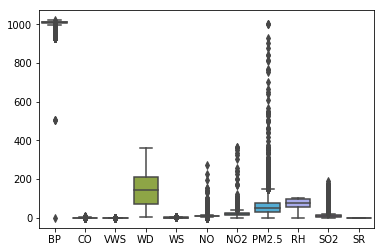

In [191]:
sns.boxplot(data=df)

In [192]:
df.shape

(8634, 12)

In [193]:
df['location']=2
df['location']=df['location'].astype('category')

In [194]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR,location
0,01-01-2018 00:00,1008.30,0.0,0.23,329.17,0.64,16.13,8.20,88.01,89.18,2.76,0.0,2
1,01-01-2018 01:00,1007.88,0.0,0.23,328.17,0.61,15.25,2.66,75.69,89.19,2.82,0.0,2
2,01-01-2018 02:00,1007.55,0.0,0.22,335.16,0.61,14.49,0.92,55.88,89.19,2.61,0.0,2
3,01-01-2018 03:00,1007.20,0.0,0.21,335.65,0.62,12.76,1.93,50.68,89.19,2.58,0.0,2
4,01-01-2018 04:00,1006.88,0.0,0.23,328.27,0.57,10.26,3.26,47.27,89.19,2.18,0.0,2


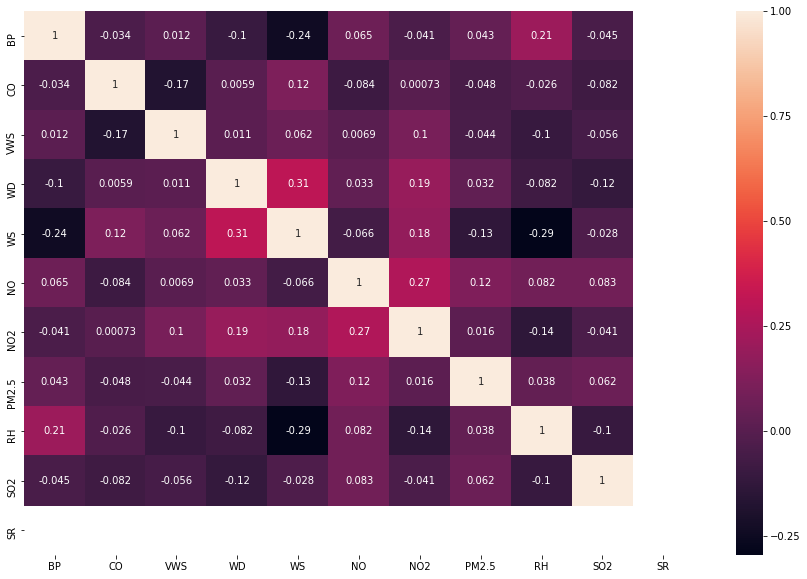

In [195]:
m=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(m,annot=True)

In [196]:
df.columns

Index(['From Date', 'BP', 'CO', 'VWS', 'WD', 'WS', 'NO', 'NO2', 'PM2.5', 'RH',
       'SO2', 'SR', 'location'],
      dtype='object')

In [197]:
"""iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)
up_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)
low_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)

iqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)
up_co=df['CO'].quantile(.75)+(1.5*iqr_co)
low_co=df['CO'].quantile(.25)-(1.5*iqr_co)

iqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)
up_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)
low_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)


iqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)
up_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)
low_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)


iqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)
up_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)
low_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)

iqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)
up_no=df['NO'].quantile(.75)+(1.5*iqr_no)
low_no=df['NO'].quantile(.25)-(1.5*iqr_no)

iqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)
up_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)
low_no2=df['NO2'].quantile(.25)-(1.5*iqr_no2)


iqr_pm=df['PM2.5'].quantile(.75)-df['PM2.5'].quantile(.25)
up_pm=df['PM2.5'].quantile(.75)+(1.5*iqr_pm)
low_pm=df['PM2.5'].quantile(.25)-(1.5*iqr_pm)

iqr_rh=df['RH'].quantile(.75)-df['RH'].quantile(.25)
up_rh=df['RH'].quantile(.75)+(1.5*iqr_rh)
low_rh=df['RH'].quantile(.25)-(1.5*iqr_rh)

iqr_so2=df['SO2'].quantile(.75)-df['SO2'].quantile(.25)
up_so2=df['SO2'].quantile(.75)+(1.5*iqr_so2)
low_so2=df['SO2'].quantile(.25)-(1.5*iqr_so2)

iqr_sr=df['SR'].quantile(.75)-df['SR'].quantile(.25)
up_sr=df['SR'].quantile(.75)+(1.5*iqr_sr)
low_sr=df['SR'].quantile(.25)-(1.5*iqr_sr)
"""

"iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)\nup_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)\nlow_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)\n\niqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)\nup_co=df['CO'].quantile(.75)+(1.5*iqr_co)\nlow_co=df['CO'].quantile(.25)-(1.5*iqr_co)\n\niqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)\nup_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)\nlow_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)\n\n\niqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)\nup_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)\nlow_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)\n\n\niqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)\nup_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)\nlow_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)\n\niqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)\nup_no=df['NO'].quantile(.75)+(1.5*iqr_no)\nlow_no=df['NO'].quantile(.25)-(1.5*iqr_no)\n\niqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)\nup_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)\nlow_no2=df['NO2'].quantil

In [198]:
"""for i in df['CO']:
    if(i>up_co):
        df['CO']=df['CO'].replace(i,up_co)

for i in df['NO2']:
    if(i>up_no2):
        df['NO2']=df['NO2'].replace(i,up_no2)
for i in df['NO']:
    if(i>up_no):
        df['NO']=df['NO'].replace(i,up_no)

for i in df['SO2']:
    if(i>up_so2):
        df['SO2']=df['SO2'].replace(i,up_so2)
        
for i in df['RH']:
    if(i>up_rh):
        df['RH']=df['RH'].replace(i,up_rh)
        
for i in df['VWS']:
    if(i>up_vws):
        df['VWS']=df['VWS'].replace(i,up_vws)
        
for i in df['WS']:
    if(i>up_ws):
        df['WS']=df['WS'].replace(i,up_ws)
        
for i in df['WD']:
    if(i>up_wd):
        df['WD']=df['WD'].replace(i,up_wd)
        
for i in df['PM2.5']:
    if(i>up_pm):
        df['PM2.5']=df['PM2.5'].replace(i,up_pm)
        
for i in df['SR']:
    if(i>up_sr):
        df['SR']=df['SR'].replace(i,up_sr)

for i in df['BP']:
    if(i<low_bp):
        df['BP']=df['BP'].replace(i,low_bp)
    elif(i>up_bp):
        df['BP']=df['BP'].replace(i,up_bp)"""

"for i in df['CO']:\n    if(i>up_co):\n        df['CO']=df['CO'].replace(i,up_co)\n\nfor i in df['NO2']:\n    if(i>up_no2):\n        df['NO2']=df['NO2'].replace(i,up_no2)\nfor i in df['NO']:\n    if(i>up_no):\n        df['NO']=df['NO'].replace(i,up_no)\n\nfor i in df['SO2']:\n    if(i>up_so2):\n        df['SO2']=df['SO2'].replace(i,up_so2)\n        \nfor i in df['RH']:\n    if(i>up_rh):\n        df['RH']=df['RH'].replace(i,up_rh)\n        \nfor i in df['VWS']:\n    if(i>up_vws):\n        df['VWS']=df['VWS'].replace(i,up_vws)\n        \nfor i in df['WS']:\n    if(i>up_ws):\n        df['WS']=df['WS'].replace(i,up_ws)\n        \nfor i in df['WD']:\n    if(i>up_wd):\n        df['WD']=df['WD'].replace(i,up_wd)\n        \nfor i in df['PM2.5']:\n    if(i>up_pm):\n        df['PM2.5']=df['PM2.5'].replace(i,up_pm)\n        \nfor i in df['SR']:\n    if(i>up_sr):\n        df['SR']=df['SR'].replace(i,up_sr)\n\nfor i in df['BP']:\n    if(i<low_bp):\n        df['BP']=df['BP'].replace(i,low_bp)\n    e

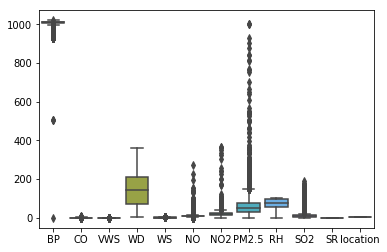

In [199]:
sns.boxplot(data=df)

In [200]:
result_csv1 = df.to_csv (r'C:\dse_new\eda_man_18.csv', index = None, header=True)

# Upto this basic EDA is done

# ---------------------------------------------------------------------------------------------------------------